#### Progression model evaluation

In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,confusion_matrix

In [2]:
#En son veriler
X_train=pd.read_csv("X_train.csv", index_col="ID")
X_test=pd.read_csv("X_test.csv", index_col="ID")
y_train=pd.read_csv("y_train.csv", index_col="ID")
y_test=pd.read_csv("y_test.csv", index_col="ID")

In [3]:
####train encoding
y_train_progression=y_train["Progression"]

####test encoding
y_test_progression=y_test["Progression"]

In [5]:
y_train_progression.value_counts()

Progression
0    181
1    117
Name: count, dtype: int64

In [6]:
y_test_progression.value_counts()

Progression
0    45
1    30
Name: count, dtype: int64

In [7]:
#### Import selected features for INSS
selected_features_hr = pd.read_csv("final_common_features_for_Progression.csv",index_col=False)
#### Put them in a list
selected_features = selected_features_hr['FeatureName'].tolist()

#### selected feature matrix for X_train
X_train_sub_progression = X_train[selected_features]
print(X_train_sub_progression.shape)

#### selected feature matrix for X_train
X_test_sub_progression = X_test[selected_features]
print(X_test_sub_progression.shape)

(298, 112)
(75, 112)


#### RANDOM FOREST MODEL EVALUATION FOR SELECTED FEATURES

Confusion Matrix:
    0   1
0  33  12
1   8  22
Accuracy: 0.7333333333333333
Precision: 0.6470588235294118
Recall: 0.7333333333333333
F1-score: 0.6875
ROC-AUC: 0.8200000000000001
PR-AUC: 0.7224728006736074


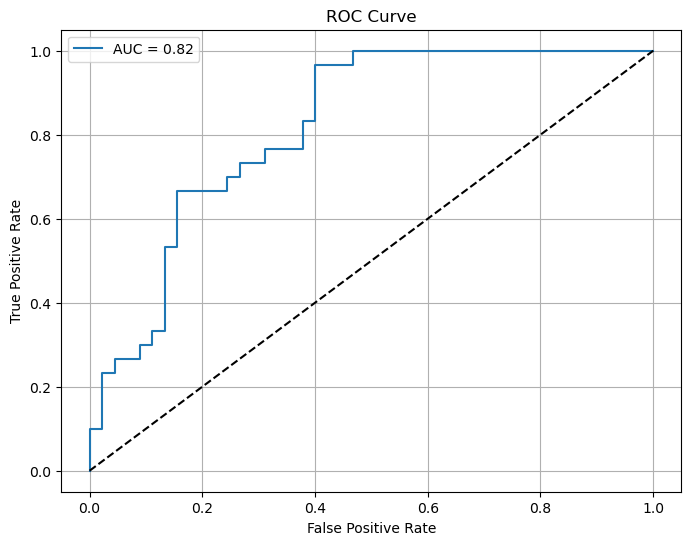

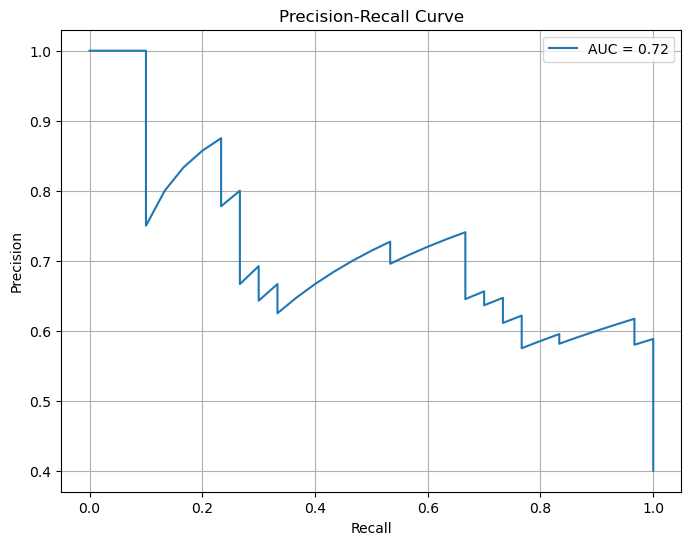

In [12]:
# Create a classifier
best_params = {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
clf = RandomForestClassifier(**best_params, random_state=42)

X_train=X_train_sub_progression.copy()
X_test=X_test_sub_progression.copy()
y_train= y_train_progression.copy()
y_test= y_test_progression.copy()
class_labels= y_test_progression.unique().tolist()

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


#### SVM MODEL EVALUATION FOR SELECTED FEATURES

Confusion Matrix:
    0   1
0  38   7
1  12  18
Accuracy: 0.7466666666666667
Precision: 0.72
Recall: 0.6
F1-score: 0.6545454545454547
ROC-AUC: 0.7911111111111111
PR-AUC: 0.730780248995818


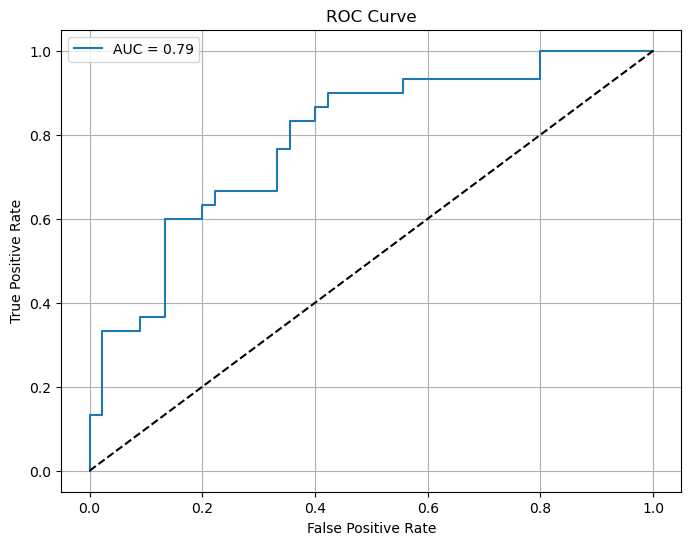

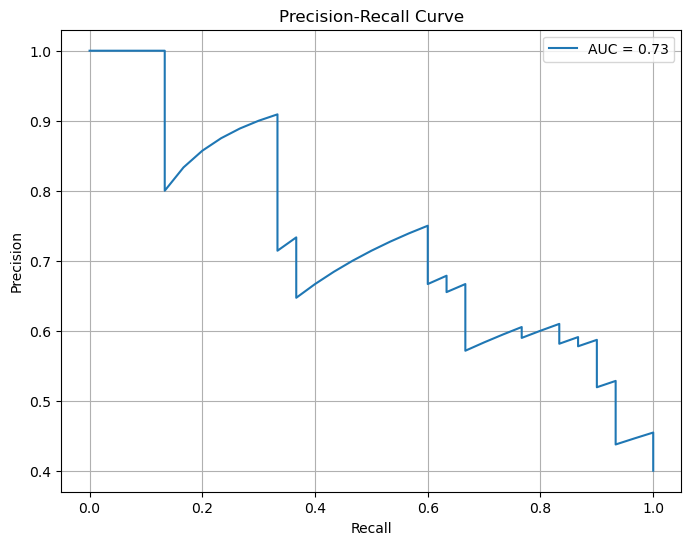

In [13]:
# Create a classifier
best_params = {'C': 577.8455734459483, 'gamma': 0.014432925245043346}
clf = SVC(**best_params, random_state=42,probability=True)

X_train=X_train_sub_progression.copy()
X_test=X_test_sub_progression.copy()
y_train= y_train_progression.copy()
y_test= y_test_progression.copy()
class_labels= y_test_progression.unique().tolist()

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### LOGISTIC REGRESSION MODEL EVALUATION FOR SELECTED FEATURES

Confusion Matrix:
    0   1
0  35  10
1  10  20
Accuracy: 0.7333333333333333
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666
ROC-AUC: 0.8088888888888889
PR-AUC: 0.6958634829101547


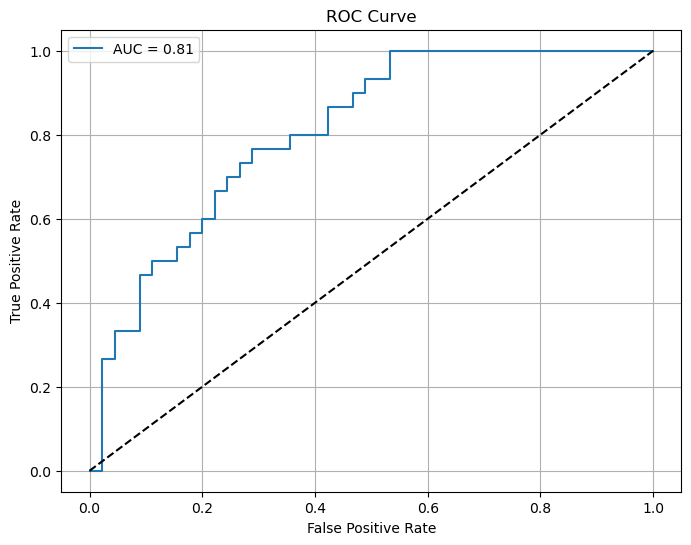

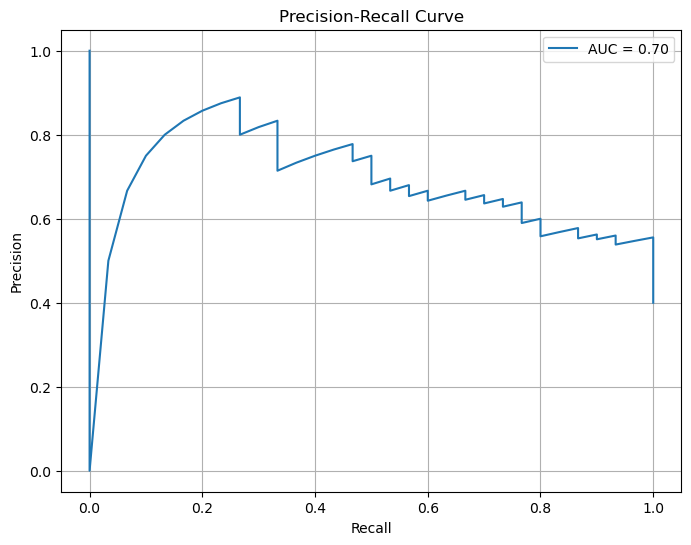

In [15]:
# Create a classifier
best_params = {'C': 0.23357214690901212, 'penalty': 'l1', 'solver': 'liblinear'}
clf = LogisticRegression(**best_params,random_state=42)

X_train=X_train_sub_progression.copy()
X_test=X_test_sub_progression.copy()
y_train= y_train_progression.copy()
y_test= y_test_progression.copy()
class_labels= y_test_progression.unique().tolist()

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### RANDOM FOREST MODEL EVALUATION FOR ALL FEATURES

Confusion Matrix:
    0   1
0  34  11
1  10  20
Accuracy: 0.72
Precision: 0.6451612903225806
Recall: 0.6666666666666666
F1-score: 0.6557377049180327
ROC-AUC: 0.814074074074074
PR-AUC: 0.7177916469042098


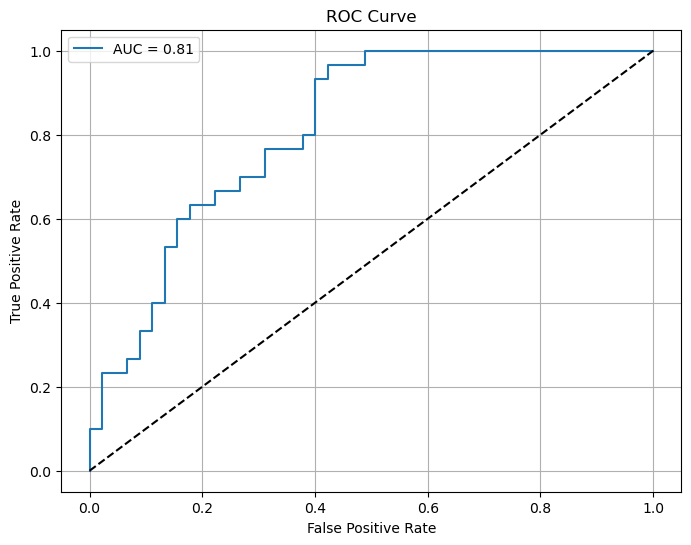

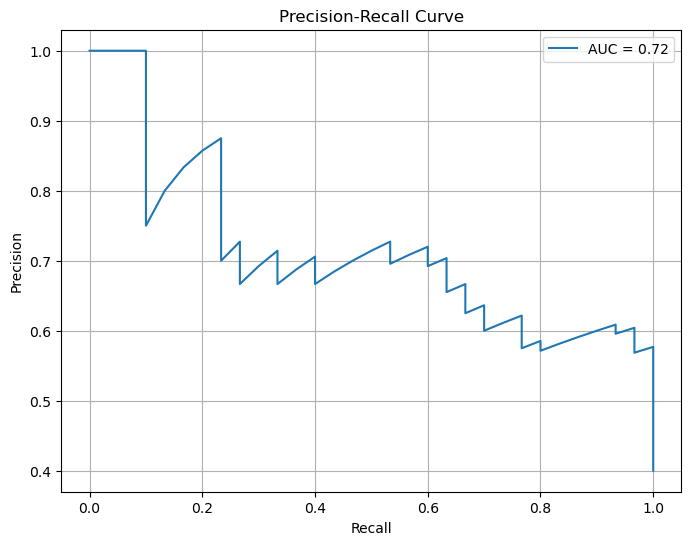

In [16]:
# Create a classifier
best_params = {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}
clf = RandomForestClassifier(**best_params,random_state=42)

X_train=X_train.copy()
X_test=X_test.copy()
y_train= y_train_progression.copy()
y_test= y_test_progression.copy()
class_labels= y_test_progression.unique().tolist()

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### SVM MODEL EVALUATION FOR ALL FEATURES

Confusion Matrix:
    0  1
0  45  0
1  30  0
Accuracy: 0.6
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC: 0.49407407407407405
PR-AUC: 0.39735159817351595


c:\Users\isile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


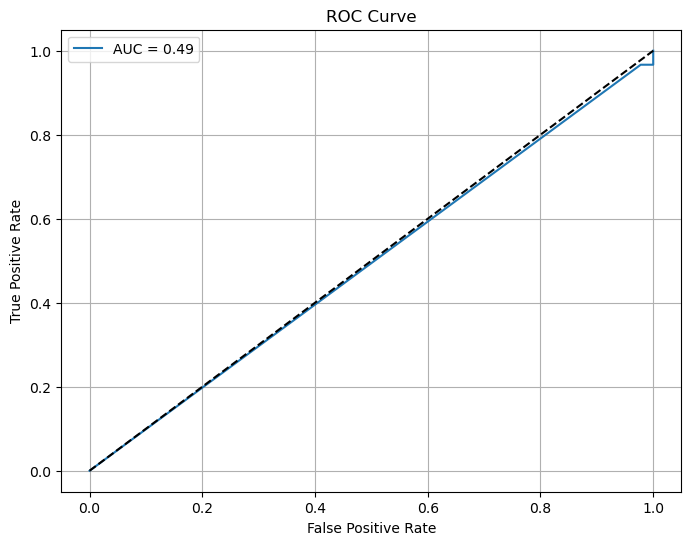

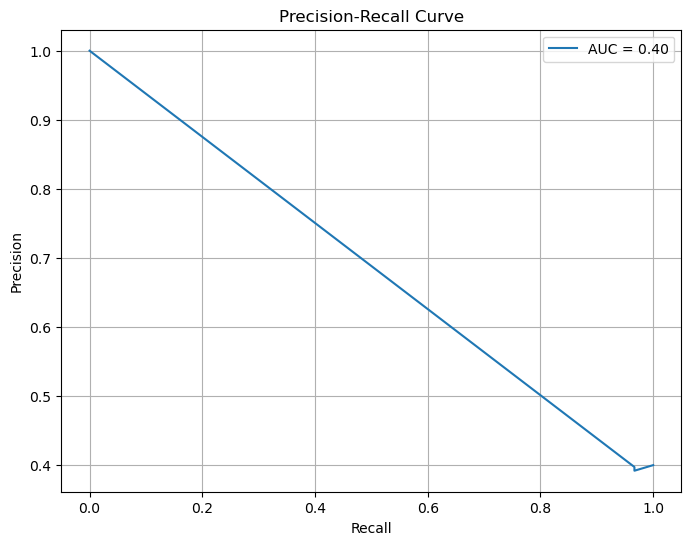

In [17]:
# Create a classifier
best_params = {'C': 0.0019264458060227832, 'gamma': 1.0929230275330446}
clf = SVC(**best_params,random_state=42,probability=True)

X_train=X_train.copy()
X_test=X_test.copy()
y_train= y_train_progression.copy()
y_test= y_test_progression.copy()
class_labels= y_test_progression.unique().tolist()

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### LOGISTIC REGRESSION MODEL EVALUATION FOR ALL FEATURES

Confusion Matrix:
    0   1
0  32  13
1  18  12
Accuracy: 0.5866666666666667
Precision: 0.48
Recall: 0.4
F1-score: 0.4363636363636364
ROC-AUC: 0.6807407407407408
PR-AUC: 0.5706949055047101


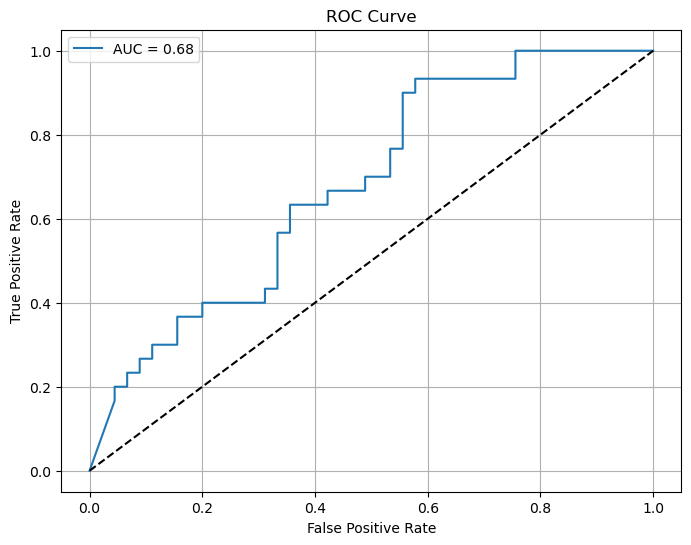

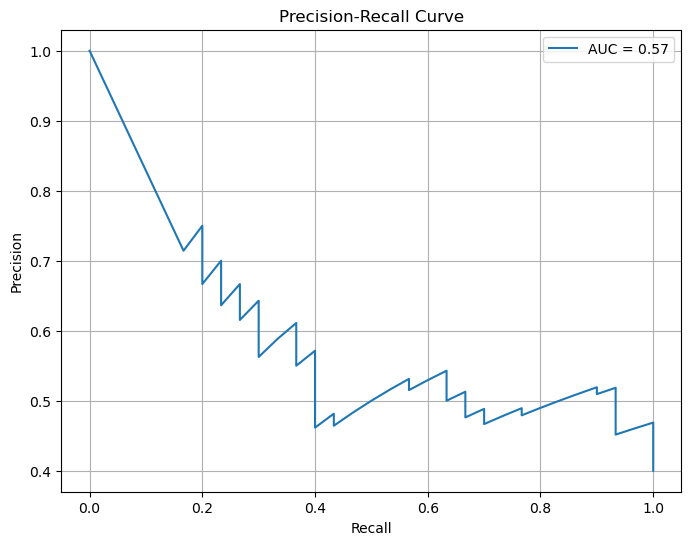

In [18]:
# Create a classifier
best_params = {'C': 29.763514416313132, 'penalty': 'l1', 'solver': 'liblinear'}
clf = LogisticRegression(**best_params,random_state=42)

X_train=X_train.copy()
X_test=X_test.copy()
y_train= y_train_progression.copy()
y_test= y_test_progression.copy()
class_labels= y_test_progression.unique().tolist()

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()